#Bài tập

1. Hãy dùng thuật toán K-mean để chọn ra số cụm thích hợp (như trong slide bài giảng) dựa trên tập training, và dự đoán label của các quan sát trên tập testing của bộ dữ liệu bên dưới.
2. Vẽ hình các cụm trên tập testing

Đường cong WCV nên như sau:

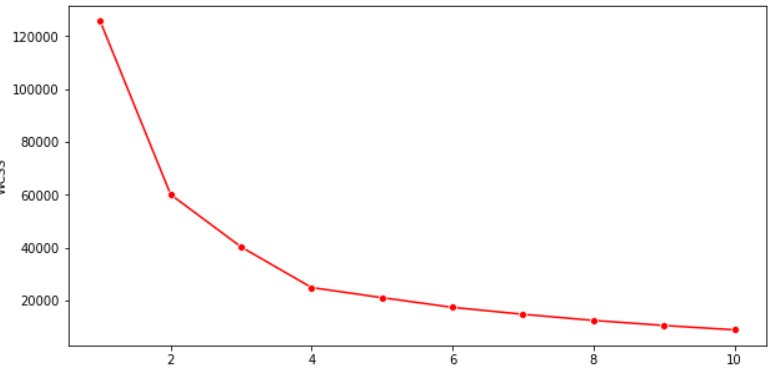

# Bài làm

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
!wget "https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data.csv"

--2021-05-15 13:50:18--  https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/plain]
Saving to: ‘data.csv.3’

data.csv.3          100%[===================>]   4.19K  --.-KB/s    in 0s      

2021-05-15 13:50:18 (60.4 MB/s) - ‘data.csv.3’ saved [4286/4286]



In [3]:
data = pd.read_csv("data.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Đây là data thông tin về khách hàng. Từ đây, ta sẽ tiến hành phân cụm các khách hàng này.
data này gồm:
* CustomerID: Số thứ tự khách hàng
* Genre: Giới tính
* Age: Tuổi
* Annual Income: Mức thu nhập hằng năm
* Spending Score: Chỉ số tiêu dùng 

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#Check missing values
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#Xử lý biến categorycal Genre
data['Genre'] = data['Genre'].astype('category')
data['Genre'] = data['Genre'].cat.codes
data.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
12,13,0,58,20,15
20,21,1,35,24,35
112,113,0,38,64,42
166,167,1,42,86,20
146,147,1,48,77,36
100,101,0,23,62,41
56,57,0,51,44,50
105,106,0,21,62,42
81,82,1,38,54,55
33,34,1,18,33,92


In [8]:
#Drop duplicates 
data.drop_duplicates(inplace=True)

In [9]:
X = data.iloc[:, [2, 3]].values
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
np.random.seed(42)

In [10]:
#gán label sau mỗi vòng lặp
def assign_label(X,centers):
    D=cdist(X,centers,'euclidean') #thư viện để tính khoảng cách euclidean
    return np.argmin(D,axis=1)


#gán các centroids sau mỗi vòng lặp
def update_centroids(X,label,k):
    center=np.zeros([k,X.shape[1]])
    for i in range(k):
        X_=X[label==i, :]
        center[i,:]=np.mean(X_,axis=0)
    return center


#Check xem đã hội tụ chưa
def has_converged(new_label,old_label):
    return (new_label==old_label).all()

#Tinh WCV
def calc_WCV(X,centroids):
    return sum(np.min(cdist(X,centroids,'euclidean'), axis = 1))

#Hàm phân cụm
def k_means_clustering(k, X):
    '''
    Input: no of cluster, array of datapoint
    Return: Label of each datapoint, all centroids
    '''
    #init centroid
    centroids = X[np.random.choice(X.shape[0],k,replace=False)]
    while True:
        #đánh label
        labels=assign_label(X,centroids)
        #lưu các centroids cũ
        old_centers=centroids.copy()
        centroids=update_centroids(X,labels,k)
        if has_converged(centroids,old_centers):
            break
            
    return labels, centroids

In [11]:
#Tính giá trị WCV trên từng trường hợp có 1 đến 10 cụm

K = range(1,11)
l_WCW = []
for k in K:
    labels, centroids = k_means_clustering(k,X_train)
        
    WCV = calc_WCV(X_train, centroids)
    l_WCW.append(WCV)

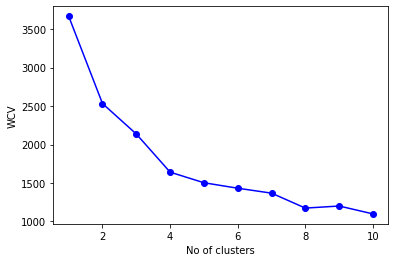

In [12]:
import matplotlib.pyplot as plt

plt.plot(K, l_WCW, 'bo-')
plt.xlabel('No of clusters')
plt.ylabel('WCV')
plt.show()

In [13]:
#Chọn k = 4 (khuỷu tay trên biểu đồ WCV)
train_labels_4, centroids_4 = k_means_clustering(4, X_train)

In [14]:
#Hàm biểu diễn các cụm: TH có 4 cụm
def kmeans_display(X, label):
    
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    
    plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 4, alpha = .8)
    plt.plot(X1[:,0], X1[:,1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:,0], X2[:,1], 'ro', markersize = 4, alpha = .8)
    plt.plot(X3[:,0], X3[:,1], 'mo', markersize = 4, alpha = .8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()

In [15]:
X_train[train_labels_4 == 0, :][:,0]

array([36, 28, 32, 34, 47, 32, 41, 37, 59, 30, 58, 32, 29, 45, 33, 38, 30,
       41, 35])

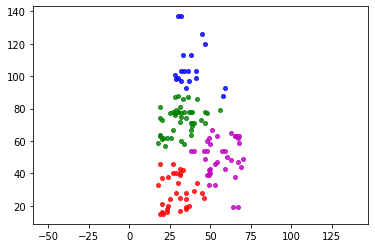

In [16]:
#Các cụm trên tập train
kmeans_display(X_train, train_labels_4)

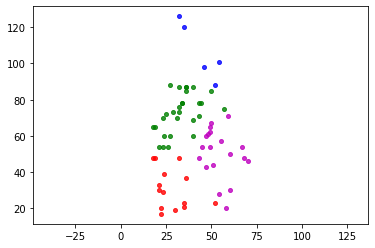

In [17]:
#Các cụm trên tập test
test_label_4 = assign_label(X_test,centroids_4)
kmeans_display(X_test, test_label_4)

# Sử dụng 3 features

In [18]:
X = data.iloc[:, [4, 2, 3]].values
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
np.random.seed(42)

In [19]:
#Tính giá trị WCV trên từng trường hợp có 1 đến 10 cụm

K = range(1,11)
l_WCW = []
for k in K:
    labels, centroids = k_means_clustering(k, X_train)
        
    WCV = calc_WCV(X_train, centroids)
    l_WCW.append(WCV)

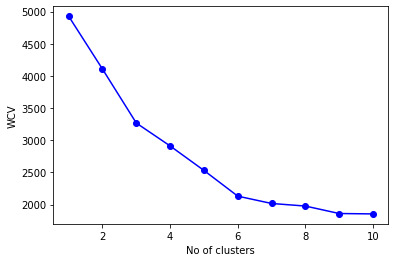

In [20]:
import matplotlib.pyplot as plt

plt.plot(K, l_WCW, 'bo-')
plt.xlabel('No of clusters')
plt.ylabel('WCV')
plt.show()

In [21]:
#Chọn k = 3
train_labels_3, centroids_3 = k_means_clustering(3, X_train)

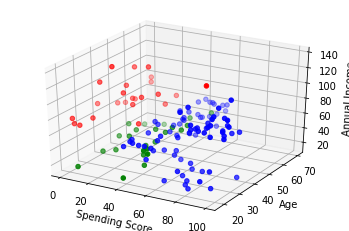

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X_train[train_labels_3 == 0, :][:,0]
ys = X_train[train_labels_3 == 0, :][:,1]
zs = X_train[train_labels_3 == 0, :][:,2]
ax.scatter(xs, ys, zs, c='r', marker='o')


xs = X_train[train_labels_3 == 1, :][:,0]
ys = X_train[train_labels_3 == 1, :][:,1]
zs = X_train[train_labels_3 == 1, :][:,2]
ax.scatter(xs, ys, zs, c='b', marker='o')

xs = X_train[train_labels_3 == 2, :][:,0]
ys = X_train[train_labels_3 == 2, :][:,1]
zs = X_train[train_labels_3 == 2, :][:,2]
ax.scatter(xs, ys, zs, c='g', marker='o')


ax.set_xlabel('Spending Score')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income')

plt.show()

Text(0.5, 0, 'Annual Income')

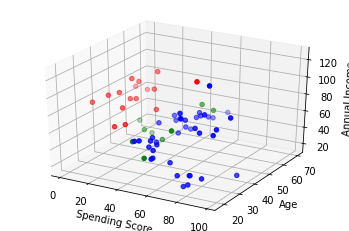

In [23]:
test_label_3 = assign_label(X_test, centroids_3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X_test[test_label_3 == 0, :][:,0]
ys = X_test[test_label_3 == 0, :][:,1]
zs = X_test[test_label_3 == 0, :][:,2]
ax.scatter(xs, ys, zs, c='r', marker='o')


xs = X_test[test_label_3 == 1, :][:,0]
ys = X_test[test_label_3 == 1, :][:,1]
zs = X_test[test_label_3 == 1, :][:,2]
ax.scatter(xs, ys, zs, c='b', marker='o')

xs = X_test[test_label_3 == 2, :][:,0]
ys = X_test[test_label_3 == 2, :][:,1]
zs = X_test[test_label_3 == 2, :][:,2]
ax.scatter(xs, ys, zs, c='g', marker='o')

xs = X_test[test_label_3 == 3, :][:,0]
ys = X_test[test_label_3 == 3, :][:,1]
zs = X_test[test_label_3 == 3, :][:,2]
ax.scatter(xs, ys, zs, c='m', marker='o')


ax.set_xlabel('Spending Score')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income')